##Project III Model 1

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error

/Users/denny_home/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [64]:
students = pd.read_csv('student-mat.csv', sep=';')

In [4]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets: 
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
2 sex - student's sex (binary: 'F' - female or 'M' - male) 
3 age - student's age (numeric: from 15 to 22) 
4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
16 schoolsup - extra educational support (binary: yes or no) 
17 famsup - family educational support (binary: yes or no) 
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
19 activities - extra-curricular activities (binary: yes or no) 
20 nursery - attended nursery school (binary: yes or no) 
21 higher - wants to take higher education (binary: yes or no) 
22 internet - Internet access at home (binary: yes or no) 
23 romantic - with a romantic relationship (binary: yes or no) 
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
29 health - current health status (numeric: from 1 - very bad to 5 - very good) 
30 absences - number of school absences (numeric: from 0 to 93) 

# these grades are related with the course subject, Math or Portuguese: 
31 G1 - first period grade (numeric: from 0 to 20) 
31 G2 - second period grade (numeric: from 0 to 20) 
32 G3 - final grade (numeric: from 0 to 20, output target)

In [28]:
students[students.studytime >3]['G3'].mean()

11.25925925925926

In [11]:
students.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [24]:
students['nursery'].head()

0    yes
1     no
2    yes
3    yes
4    yes
Name: nursery, dtype: object

In [103]:
x_varsa=stdata.drop(['G3'],axis=1)

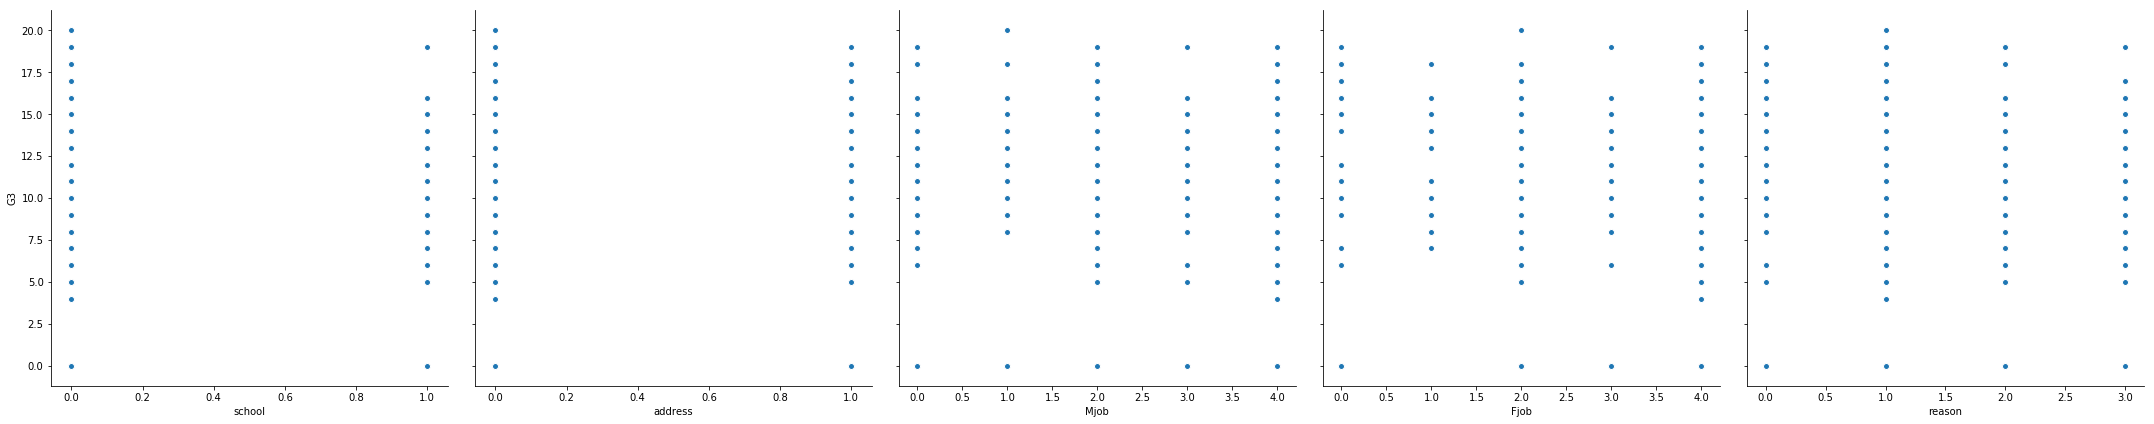

In [105]:
sns.pairplot(x_vars = ['school', 'address', 'Mjob','Fjob','reason'], y_vars = 'G3',  size = 6, data = stdata)

In [66]:
stdata=students

In [97]:
stdata = stdata.replace({"reason": {"home": 0, "reputation": 1, "course":2, "other": 3}})

In [94]:
stdata = stdata.replace({"address": {"U": 0, "R": 1}})

In [82]:
stdata['schoolsup'].value_counts()

0    344
1     51
Name: schoolsup, dtype: int64

In [98]:
corr_mat = stdata.corr()

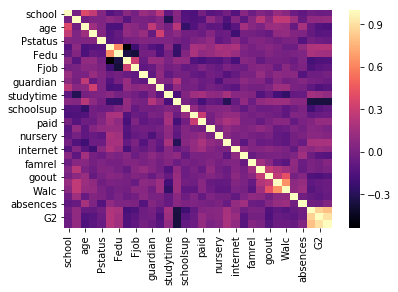

In [99]:
plt.figure()
sns.heatmap(corr_mat, cmap = 'magma')

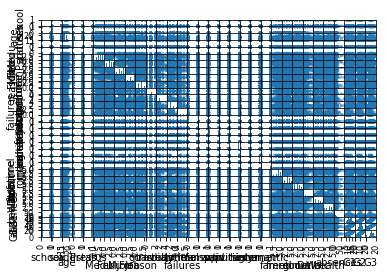

In [101]:
from pandas.plotting import scatter_matrix
scatter_matrix(stdata);

In [106]:
### regroup G3 into 4 groups: 0-5 = 1, 6-10 = 2, 11-15 = 3, 16-20 = 4
stdata['Grade']=stdata['G3']

In [109]:
stdata.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Grade
0,0,0,18,0,1,0,4,4,3,0,...,3,4,1,1,3,6,5,6,6,2
1,0,0,17,0,1,1,1,1,3,4,...,3,3,1,1,3,4,5,5,6,2
2,0,0,15,0,LE3,1,1,1,3,4,...,3,2,2,3,3,10,7,8,10,2
3,0,0,15,0,1,1,4,2,1,2,...,2,2,1,1,5,2,15,14,15,3
4,0,0,16,0,1,1,3,3,4,4,...,3,2,1,2,5,4,6,10,10,2


In [108]:
a = []
for name in stdata['G3']:
    if name < 6:
        a.append('1')
    elif name >5 and name <11:
        a.append('2')
    elif name >10 and name <16:
        a.append('3')
    elif name > 15:
        a.append('4')
stdata['Grade']=a

In [123]:
stdata['Grade'].value_counts(normalize=True)

3    0.427848
2    0.354430
1    0.116456
4    0.101266
Name: Grade, dtype: float64

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [113]:
modeldata = stdata[['school','Pstatus','Medu','Fedu','studytime','famrel']]
y = stdata['Grade']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(modeldata,y)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(modeldata,y)
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
lg_pred = lgr.predict(X_train)
#print(confusion_matrix(y_train, lg_pred))
print(classification_report(y_train, lg_pred))

             precision    recall  f1-score   support

          1       0.00      0.00      0.00        35
          2       0.43      0.43      0.43       104
          3       0.46      0.71      0.56       122
          4       0.00      0.00      0.00        35

avg / total       0.34      0.45      0.38       296



/Users/denny_home/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [124]:
from sklearn.model_selection import cross_val_predict
lgr_scores = cross_val_predict(lgr, X_train, y_train, cv = 5, method = 'decision_function')

In [125]:
lgr_scores[:10]

array([[-2.51522768, -0.88691983, -0.02426732, -1.38167959],
       [-1.79651563, -0.94340439, -0.38881244, -1.7668714 ],
       [-2.35658092, -1.52106678,  0.29210176, -0.91191018],
       [-2.07280446, -0.91251635, -0.34183166, -2.01977299],
       [-1.49344717, -0.76739648,  0.02029954, -3.21027734],
       [-1.68957204, -1.07312412,  0.11903623, -2.81977267],
       [-2.63286974, -1.49017874,  0.33908254, -1.16481176],
       [-3.00736995, -0.7393985 , -0.01101787, -2.57463706],
       [-2.04266251, -0.78378922, -0.3114534 , -2.08199432],
       [-2.4547923 , -0.80117458, -0.10497942, -2.06883389]])

In [137]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, auc

In [138]:
%matplotlib notebook

In [145]:
from sklearn.metrics import precision_recall_curve
y_scores_lr = lgr.fit(X_train, y_train).decision_function(X_test)


In [146]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure(figsize = (7, 7))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)

ValueError: multiclass format is not supported

In [147]:
precision_recall_curve?

In [140]:
plt.figure(figsize = (7, 7))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)

<IPython.core.display.Javascript object>

NameError: name 'precision' is not defined